### 정확도 향상 방안
1. AdamOptimizer사용
2. ReLU 사용
3. xavier_initializer사용: weight의 초기값을 할당
4. DNN 사용 : 3층 --> 5층
5. dropout 사용

약 97%으로 향상

6. CNN(합성곱 신경망)
7. ensemble 사용

약 99.5%으로 향상

In [1]:
# tf.IntereractiveSession()
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

sess = tf.InteractiveSession()

a = tf.constant(10)
b = tf.constant(20)
add_node = tf.add(a,b)

print(add_node.eval())
print(sess.run(add_node))


30
30


In [2]:
c = tf.constant(100)
c.eval()

100

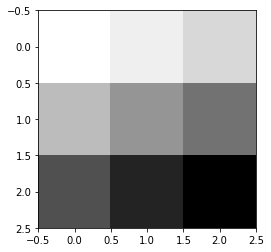

In [3]:
# CNN(Convolutional Neural Network)
# conv2d 출력 이미지 = (N - F)/stride + 1

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# (1,3,3,1) , 3*3 Greyscale toy image,원본 입력이미지
# 1 : 이미지의 갯수
# 3 : 가로 픽셀수
# 3 : 세로 픽셀수
# 1 : color수,Grey 
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]],dtype=np.float32)
# print(image)
image.shape #(1, 3, 3, 1)
plt.imshow(image.reshape(3,3),cmap='Greys')
plt.show()

In [4]:
# sess = tf.InteractiveSession()
# a = tf.constant(10)
# b = tf.constant(20)
# add_node = tf.add(a,b)
# print(add_node.eval())

[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
[[12. 16.]
 [24. 28.]]


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\client\session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


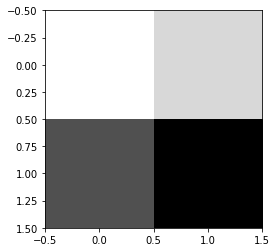

In [5]:
# conv2d, Padding
# image :(1, 3, 3, 1), filter: (2,2,1,1), stride:(1,1)
# filter: (2,2,1,1)
# 2 : 가로 갯수
# 2 : 세로 갯수
# 1 : color
# 1 : filter의 갯수

# (N - F)/stride + 1 공식을 사용
# (3 - 2)/1 + 1 = 2  ,zero padding을 안했을 때
# (4 - 2)/1 + 1 = 3  ,zero padding을 했을 때

# padding을 안했을 때 : 'VALID'
# 출력이미지 : (1,2,2,1)
sess = tf.InteractiveSession()
# filter: (2,2,1,1)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],
                     padding='VALID')
conv2d_img = conv2d.eval()  # (1,2,2,1)
print(conv2d_img)
# print('conv2d_img shape:',conv2d_img.shape)

# 시각화
for i,one_image in enumerate(conv2d_img):
    print(one_image.reshape(2,2))  
    plt.imshow(one_image.reshape(2,2),cmap='Greys')
plt.show()

[[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]]
conv2d_img shape: (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


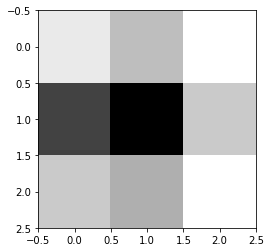

In [6]:
# padding을 했을 때 : 'SAME'
# image :(1, 3, 3, 1), filter: (2,2,1,1), stride:(1,1)
# 출력이미지 : (1,3,3,1)
# sess = tf.InteractiveSession()
# filter: (2,2,1,1)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],
                     padding='SAME')
conv2d_img = conv2d.eval()  # (1,3,3,1)

# (1,3,3,1)
# 1 : color
# (N - F)/stride + 1
# ( 3+1 - 2)/1 + 1 --> 3
# ( 3+1 - 2)/1 + 1 --> 3
# 1: 이미지의 갯수(사용된 필터의 갯수)
print(conv2d_img)
print('conv2d_img shape:',conv2d_img.shape)

# 시각화
for i,one_image in enumerate(conv2d_img):
    print(one_image.reshape(3,3))  
    plt.imshow(one_image.reshape(3,3),cmap='Greys')
plt.show()

conv2d_img.shape: (1, 3, 3, 3)
conv2d_img.shape: (3, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


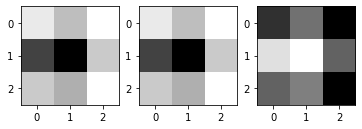

In [7]:
# conv2d : 3 filters, Padding : SAME (zero padding 함)
# image : (1,3,3,1) , Filter: (2,2,1,3), stride : (1,1)
# 출력 이미지 : (1,3,3,3)
# 1 : color
# (N - F)/stride + 1
# ( 3+1 - 2)/1 + 1 --> 3
# ( 3+1 - 2)/1 + 1 --> 3
# 3: 이미지의 갯수(사용된 필터의 갯수)
# filter : (2,2,1,3)
weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],
                     padding='SAME')
conv2d_img = conv2d.eval()  # (1,3,3,3)
print('conv2d_img.shape:',conv2d_img.shape) # (1,3,3,3)
conv2d_img = np.swapaxes(conv2d_img,0,3)    # (3, 3, 3, 1)
print('conv2d_img.shape:',conv2d_img.shape)  

# 시각화
for i,one_image in enumerate(conv2d_img):
    print(one_image.reshape(3,3))  
    plt.subplot(1,3,i + 1)
    plt.imshow(one_image.reshape(3,3),cmap='Greys')
plt.show()

(1, 2, 2, 1)


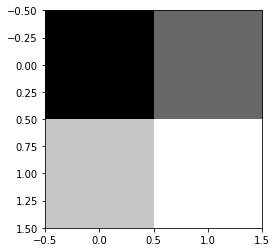

In [8]:
# max pooling  : (1,2,2,1)  --> (1,2,2,1) , Padding:'SAME'
image = np.array([[[[4],[3]],
                   [[2],[1]]]],dtype=np.float32)
print(image.shape)
# image
plt.imshow(image.reshape(2,2),cmap='Greys')
plt.show()

In [9]:
# image : (1,2,2,1)
pool = tf.nn.max_pool(image,ksize=[1,2,2,1],strides=[1,1,1,1],
                     padding='VALID')
print(pool.shape)
print(pool.eval())

(1, 1, 1, 1)
[[[[4.]]]]


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting Data/mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting Data/mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting Data/mnist\t10k-images-idx3-ubyte.gz
Extracting Data/mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


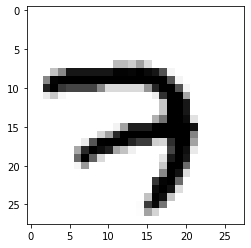

In [10]:
# MNIST image data loading
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('Data/mnist',one_hot=True)

image = mnist.train.images[0].reshape(28,28)
print(mnist.train.labels[0]) # 7
# print(image)
plt.imshow(image,cmap='Greys')
plt.show()

(1, 14, 14, 5)
(5, 14, 14, 1)


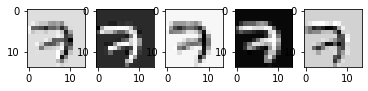

In [11]:
# MNIST Convolution layer
# image : (1,28,28,1)
img = image.reshape(-1,28,28,1)
img.shape

W = tf.Variable(tf.random_normal([3,3,1,5]),name='weight')

conv2d = tf.nn.conv2d(img,W,strides=[1,2,2,1],
                     padding="SAME")
# (28 - 3)/2 + 1  --> 14
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
print(conv2d_img.shape) # shape=(1, 14, 14, 5)
conv2d_img = np.swapaxes(conv2d_img,0,3)
print(conv2d_img.shape) # shape=(5, 14, 14, 1)

# 시각화
for i,one_image in enumerate(conv2d_img):
#     print(one_image.reshape(14,14))  
    plt.subplot(1,5,i + 1)
    plt.imshow(one_image.reshape(14,14),cmap='Greys')
plt.show()

(1, 7, 7, 5)
(5, 7, 7, 1)


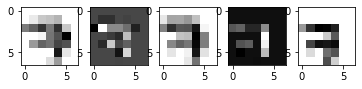

In [12]:
# MNIST Max Pooling
# conv2d : (1, 14, 14, 5), kernel size:(2,2),strides:(2,2),
# padding:'SAME'
# Output image : (1,7,7,5)
# (N-F)/stride + 1
# (15-2)/2 + 1 => 7
pool = tf.nn.max_pool(conv2d,ksize=[1,2,2,1],strides=[1,2,2,1],\
                      padding='SAME')
pool_img = pool.eval()
print(pool_img.shape) # (1, 7, 7, 5)
pool_img = np.swapaxes(pool_img,0,3)
print(pool_img.shape) # (5, 7, 7, 1)

# 시각화
for i,one_image in enumerate(pool_img):
    plt.subplot(1,5,i + 1)
    plt.imshow(one_image.reshape(7,7),cmap='Greys')
plt.show()